# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Reading and Visualising Data 

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
link = "https://drive.google.com/file/d/1ElPk74eoSSvhPc0_4DxgFJ-UsYfkrI2F/view?usp=sharing"

In [6]:
import pandas as pd
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Credit_Card_Dataset.csv') 
df = pd.read_csv('Credit_Card_Dataset.csv')

In [7]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
# Checking how many fraudile transactions there are in the dataset
(df["isFraud"] == 1).sum(), (df["isFraud"] == 0).sum(), (df["isFlaggedFraud"] == 1).sum()

(8213, 6354407, 16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


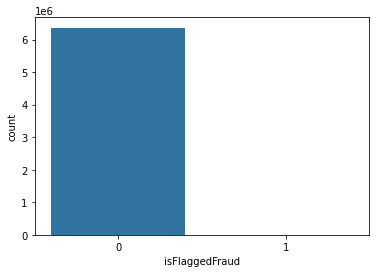

In [12]:
df.isFlaggedFraud.value_counts()
sns.countplot(df.isFlaggedFraud)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


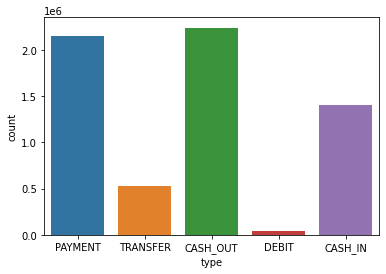

In [13]:
df.type.value_counts()
sns.countplot(df.type)

# Data Cleaning

### Ploting the transaction amounts

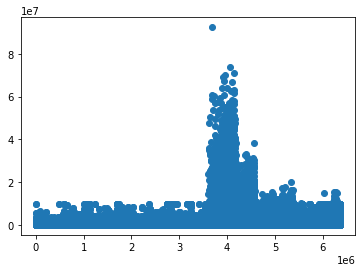

In [14]:
fig, ax = plt.subplots()
ax.scatter(df.index, df.amount);

### Droping columns on the basis of correlation

In [15]:
# Explore correlations to label
df.corr().isFlaggedFraud.sort_values(ascending=False)

isFlaggedFraud    1.000000
isFraud           0.044109
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
step              0.003277
oldbalanceDest   -0.000513
newbalanceDest   -0.000529
Name: isFlaggedFraud, dtype: float64

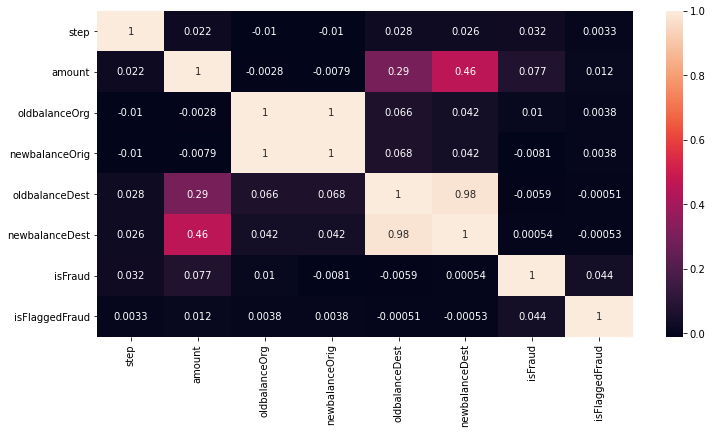

In [16]:
# Explore correlations visually
f, ax = plt.subplots(figsize=(12,6))
cor_matrix = df.corr().abs()
sns.heatmap(df.corr(), annot=True)

In [17]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                step    amount  ...   isFraud  isFlaggedFraud
step             NaN  0.022373  ...  0.031578        0.003277
amount           NaN       NaN  ...  0.076688        0.012295
oldbalanceOrg    NaN       NaN  ...  0.010154        0.003835
newbalanceOrig   NaN       NaN  ...  0.008148        0.003776
oldbalanceDest   NaN       NaN  ...  0.005885        0.000513
newbalanceDest   NaN       NaN  ...  0.000535        0.000529
isFraud          NaN       NaN  ...       NaN        0.044109
isFlaggedFraud   NaN       NaN  ...       NaN             NaN

[8 rows x 8 columns]


In [18]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['newbalanceOrig', 'newbalanceDest']


In [19]:
df = df.drop(to_drop, axis=1)
print(); print(df.head())


   step      type    amount  ... oldbalanceDest  isFraud isFlaggedFraud
0     1   PAYMENT   9839.64  ...            0.0        0              0
1     1   PAYMENT   1864.28  ...            0.0        0              0
2     1  TRANSFER    181.00  ...            0.0        1              0
3     1  CASH_OUT    181.00  ...        21182.0        1              0
4     1   PAYMENT  11668.14  ...            0.0        0              0

[5 rows x 9 columns]


In [20]:
df.shape

(6362620, 9)

### Cleaning Outliers using zscore

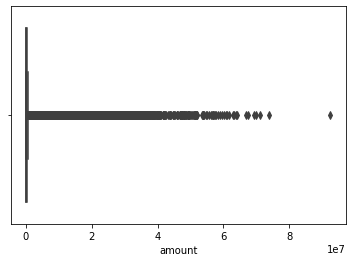

In [ ]:
# Boxplot to check outlier value
sns.boxplot(data=df,x=df['amount'])

In [ ]:
z = np.abs(stats.zscore(df))
print(z)

In [ ]:
threshold = 3
print(np.where(z > 3))

In [ ]:
df = df[(z < 3).all(axis=1)]
df.shape

# Data Processing

In [21]:
# converting non numerical data to numberical data
le = LabelEncoder()
df.type = le.fit_transform(df.type)

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,M1979787155,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,M2044282225,0.0,0,0
2,1,4,181.00,C1305486145,181.0,C553264065,0.0,1,0
3,1,1,181.00,C840083671,181.0,C38997010,21182.0,1,0
4,1,3,11668.14,C2048537720,41554.0,M1230701703,0.0,0,0


### Spliting Imbalanced using stratify parameter  

In [22]:
# Split data into 80% train and 20% test
X = df.drop(columns=['isFlaggedFraud', 'nameDest', 'nameOrig'], axis=1)
y = df['isFraud']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,stratify=y, random_state=0)

In [23]:
X_train.shape, X_val.shape

((5090096, 6), (1272524, 6))

# Modelling

### Logistic Regression

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# Apply model to validation data
y_predict = model.predict(X_val)

In [26]:

actual_vs_predict = pd.DataFrame({'Actual': y_val,
                                'Prediction': y_predict})
actual_vs_predict.sample(10)

,Actual,Prediction
260400,0,0
27617,0,0
2444074,0,0
746789,0,0
4357787,0,0
5484666,0,0
24633,0,0
5580765,0,0
6254448,0,0
349985,0,0


In [27]:
model_score = model.score(X_val, y_val)

In [28]:
confusion_matrix(y_val, y_predict)

array([[1270881,       0],
       [   1643,       0]])

In [29]:
print(model_score)

0.9987088652159016


In [30]:
print(classification_report(y_val, y_predict))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



### SVM 

In [ ]:
model = svm.SVC()
model.fit(X_train, y_train)

In [ ]:
# Apply model to validation data
y_predict = model.predict(X_val)

In [ ]:

actual_vs_predict = pd.DataFrame({'Actual': y_val,
                                'Prediction': y_predict})
actual_vs_predict.sample(10)

In [ ]:
model_score = model.score(X_val, y_val)

In [ ]:
print(model_score)

In [ ]:
print(classification_report(y_val, y_predict))

### KNN

In [45]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
# Apply model to validation data
y_predict = model.predict(X_val)

In [47]:

actual_vs_predict = pd.DataFrame({'Actual': y_val,
                                'Prediction': y_predict})
actual_vs_predict.sample(10)

,Actual,Prediction
5246950,0,0
3893039,0,0
3798991,0,0
6346903,0,0
6306039,0,0
4265652,0,0
2608576,0,0
3917437,0,0
5085283,0,0
4681367,0,0


In [48]:
model_score = model.score(X_val, y_val)

In [49]:
confusion_matrix(y_val, y_predict)

array([[1270647,     234],
       [    501,    1142]])

In [50]:
print(model_score)

0.9994224077502664


In [51]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.83      0.70      0.76      1643

    accuracy                           1.00   1272524
   macro avg       0.91      0.85      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



### Decision Tree

In [31]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
# Apply model to validation data
y_predict = model.predict(X_val)

In [33]:
actual_vs_predict = pd.DataFrame({'Actual': y_val,
                                'Prediction': y_predict})
actual_vs_predict.sample(10)

,Actual,Prediction
2396621,0,0
37158,0,0
5082091,0,0
2993184,0,0
3048593,0,0
1828167,0,0
1441981,0,0
1547782,0,0
952196,0,0
1523875,0,0


In [34]:
model_score = model.score(X_val, y_val)

In [35]:
confusion_matrix(y_val, y_predict)

array([[1270881,       0],
       [      0,    1643]])

In [36]:
print(model_score)

1.0


In [37]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      1.00      1.00      1643

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524



### Random Forest

In [38]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
y_predict = model.predict(X_val)

In [40]:
actual_vs_predict = pd.DataFrame({'Actual': y_val,
                                'Prediction': y_predict})
actual_vs_predict.sample(10)

,Actual,Prediction
1807417,0,0
3228050,0,0
3279812,0,0
683690,0,0
5671706,0,0
6198265,0,0
6013562,0,0
157278,0,0
538275,0,0
3171878,0,0


In [41]:
model_score = model.score(X_val, y_val)

In [42]:
confusion_matrix(y_val, y_predict)

array([[1270881,       0],
       [      0,    1643]])

In [43]:
print(model_score)

1.0


In [44]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      1.00      1.00      1643

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524

